#Task 2: Exploring and Visualizing a Simple Dataset
**Dataset:**
Iris Dataset



##1. Introduction and Problem Statement
**Introduction**

Data analysis begins with understanding the dataset before applying any predictive or statistical models.

 Exploratory Data Analysis (EDA) is an essential step in data science that helps identify patterns, trends, and relationships in data before applying machine learning techniques.


**Objective**

The objective of this task is to understand how to read, inspect, summarize, and visualize a dataset using Python, using commonly applied data analysis and visualization libraries.


**Problem Statement**

Raw datasets often contain patterns and relationships that are not immediately visible through simple inspection. Without proper exploratory analysis, important insights about feature distributions, variations, and class differences may be overlooked. The problem addressed in this task is to analyze and visualize a structured dataset in order to uncover meaningful patterns and relationships, providing a clear understanding of the data and a solid foundation for future analysis or modeling.

##2. Dataset Understanding and Description

The Iris dataset contains 150 observations of iris flowers from three different species:

- Iris setosa

- Iris versicolor

- Iris virginica

Each observation represents measurements taken from an individual flower.

**Features**

All numerical features are measured in centimeters (cm):

- sepal_length– length of the sepal

- sepal_width– width of the sepal

- petal_length– length of the petal

- petal_width– width of the petal

**Target Variable**

- **species** – represents the species of the iris flower

This dataset is clean, balanced, and well-structured, making it ideal for practicing exploratory data analysis.

##3. Data Loading and Cleaning
### Step 1: Import Required Libraries
In this step, we import pandas for data handling and matplotlib and seaborn for data visualization.


In [1]:
# Data Handling Library
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

- **pandas** is used for loading and analyzing tabular data

- **matplotlib** and **seaborn** are used to create visualizations

### Step 2: Load the Iris Dataset
The dataset is loaded from a CSV file into a pandas DataFrame.


In [2]:
from google.colab import files
files.upload() # Upload iris.csv

# Load dataset into DataFrame
iris = pd.read_csv("iris.csv")

Saving iris.csv to iris.csv


This allows us to work with the dataset using pandas operations.

### Step 3: Explore Dataset Structure
We examine the dataset size, column names, and first few rows to understand the data.


In [ ]:
# Dataset shape
iris.shape

(150, 5)

In [ ]:
# Column names
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
# First 5 rows
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


These steps help verify that the dataset has loaded correctly and provide an overview of the data.

###Step 4: Data Cleaning and Preparation
**Dataset Information**

The info() method provides a summary of the dataset, including column names, data types, and non-null values.

In [ ]:
# Dataset information
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Check for Missing Values**

This step checks whether there are any missing (null) values in the dataset.

In [ ]:
iris.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


**Observation:**

The dataset contains no missing values, so no imputation is required.

**Handle Missing Values**

If missing values are present, they are filled using the mean of the numerical columns.

In [ ]:
iris.fillna(iris.mean(numeric_only=True), inplace=True)

**Check for Duplicate Records**

This command checks how many duplicate rows exist in the dataset.

In [ ]:
iris.duplicated().sum()

np.int64(3)

**Remove Duplicate Records**

Duplicate rows are removed to ensure data quality.

In [ ]:
iris.drop_duplicates(inplace=True)

##4. Data Summarization
**Statistical Summary**

The describe() method provides statistical information such as mean, standard deviation, minimum, maximum, and quartiles for numerical features.

In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Class Distribution**

This step checks how many samples belong to each species.

In [ ]:
iris["species"].value_counts()

,count
species,
versicolor,50
virginica,49
setosa,48


**Insight:**

Each species has exactly 50 samples, indicating that the dataset is perfectly balanced.

##5. Exploratory Data Analysis (EDA)
### Step 5: Scatter Plot
A scatter plot is used to analyze the relationship between sepal length and sepal width across different species.


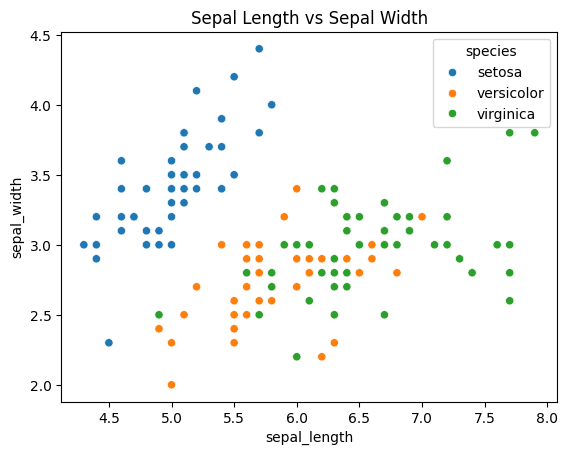

In [ ]:
plt.figure()
sns.scatterplot(
    data=iris,
    x="sepal_length",
    y="sepal_width",
    hue="species"
)
plt.title("Sepal Length vs Sepal Width")
plt.show()


**Insight:**
Different species show distinct patterns, indicating that sepal measurements vary across species.

### Step 6: Histogram
A histogram is used to analyze the distribution of petal length values.


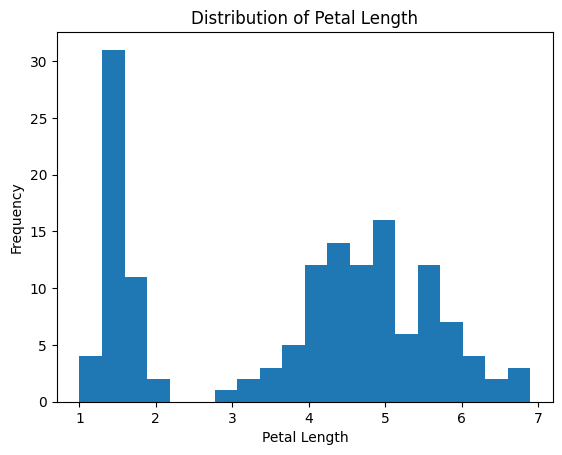

In [ ]:
plt.figure()
plt.hist(iris["petal_length"], bins=20)
plt.title("Distribution of Petal Length")
plt.xlabel("Petal Length")
plt.ylabel("Frequency")
plt.show()


**Insight:**
Petal length values are not uniformly distributed and show clustering, suggesting natural grouping among species.

### Step 7: Box Plot
A box plot helps identify outliers and understand the spread of sepal length for each species.


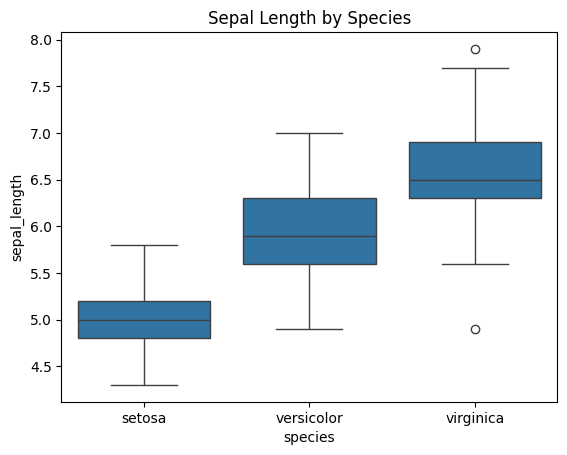

In [ ]:
plt.figure()
sns.boxplot(
    data=iris,
    x="species",
    y="sepal_length"
)
plt.title("Sepal Length by Species")
plt.show()


**Insight:**
Each species has a different range of sepal lengths, with some overlap but clear variation.

##6. Model Training and Testing

###Step 1: Import Required Libraries
These libraries are used to split the dataset, train a classification model, and evaluate its performance.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

###Step 2: Define Features and Target
- X contains the feature variables

- y contains the target labels

In [ ]:
X = iris.drop("species", axis=1)
y = iris["species"]

###Step 3: Train-Test Split
This splits the dataset into 80% training data and 20% testing data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

###Step 4: Train the Model
Logistic Regression is used as a simple baseline classification model.

In [ ]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

###Step 5: Test the Model

In [ ]:
y_pred = model.predict(X_test)

##Evaluation Metrics

**Accuracy Score**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9333333333333333

**Insight:**

The model achieves high accuracy, showing strong separability among species.

**Confusion Matrix**

In [ ]:
confusion_matrix(y_test, y_pred)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  8]])

**Explanation:**

Displays correct and incorrect classifications for each species.

#Conclusion and Key Insights
##Key Insights

- The Iris dataset contains well-structured numerical features with no missing values, making it suitable for exploratory analysis.
- Visualizations reveal clear relationships and separations between species.

- Scatter plot analysis showed a visible relationship between sepal length and sepal width, with different species forming distinguishable clusters.

- The histogram of petal length revealed that the values are not evenly distributed and tend to form natural groupings, indicating variation among species.

- Box plot analysis highlighted clear differences in sepal length ranges across species and helped identify the spread and potential outliers in the data.

- Petal features are more discriminative than sepal features.

- A simple Logistic Regression model achieves high accuracy with minimal preprocessing.

- EDA significantly improves understanding of feature behavior.

- Overall, petal measurements appear to be more discriminative than sepal measurements when comparing species.
##Conclusion

In this task, the Iris dataset was successfully loaded, inspected, and explored using pandas, matplotlib, and seaborn.
Basic visualizations such as scatter plots, histograms, and box plots helped identify relationships, distributions, and variations across species. A basic classification model was trained and evaluated, achieving strong performance.

This exploratory analysis provides a strong foundation for further statistical analysis or machine learning tasks.
